In [ ]:
import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


In [ ]:
excel_file = "/content/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx" # Replace with actual path
years = range(2010, 2017)

# df = pd.read_excel(r"path_data.xlsx")

In [ ]:
years[0]


2010

In [ ]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [ ]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [ ]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")


In [ ]:
df = pd.concat(all_data, ignore_index=True)
df.head()


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.0,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [ ]:
df.columns


Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
# Drop unwanted unnamed column
df.drop(columns=['Unnamed: 7'], inplace=True)


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [ ]:
df.isnull().sum()


,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


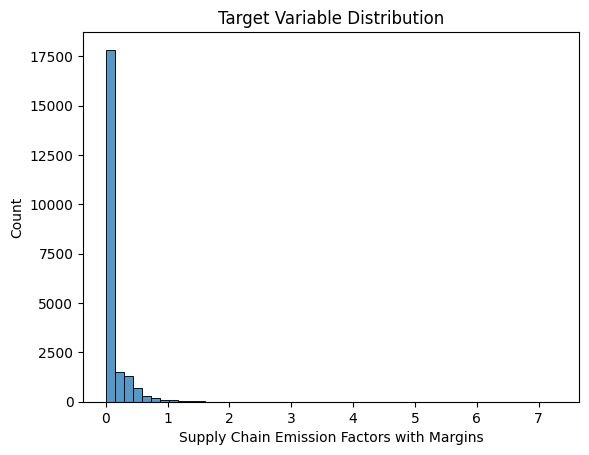

In [ ]:
# Visualize target variable distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()


In [ ]:
print(df['Substance'].value_counts())
print(df['Unit'].value_counts())
print(df['Source'].value_counts())
df['Substance'].unique()


Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64
Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64
Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [ ]:
substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
df['Substance'] = df['Substance'].map(substance_map)


In [ ]:
print(df['Unit'].unique())


['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [ ]:
unit_map = {'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1}
df['Unit'] = df['Unit'].map(unit_map)


In [ ]:
print(df['Unit'].unique())
print(df['Source'].unique())

source_map = {'Commodity': 0, 'Industry': 1}
df['Source'] = df['Source'].map(source_map)
print(df['Source'].unique())


[0 1]
['Commodity' 'Industry']
[0 1]


In [ ]:
df.info()
df.Code.unique()
df.Name.unique()
len(df.Name.unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

713

In [ ]:
df.drop(columns=['Name', 'Code', 'Year'], inplace=True)
df.shape


(22092, 11)

In [ ]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']


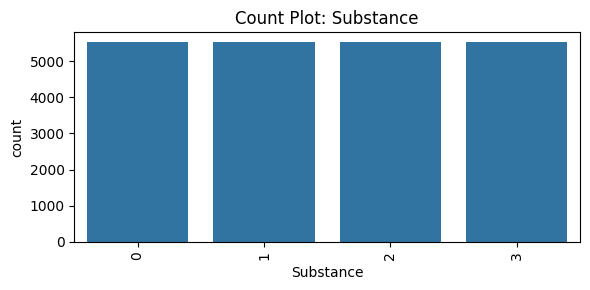

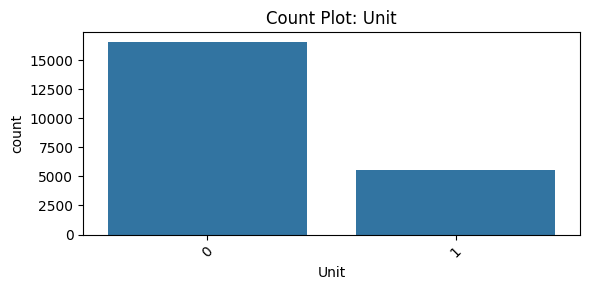

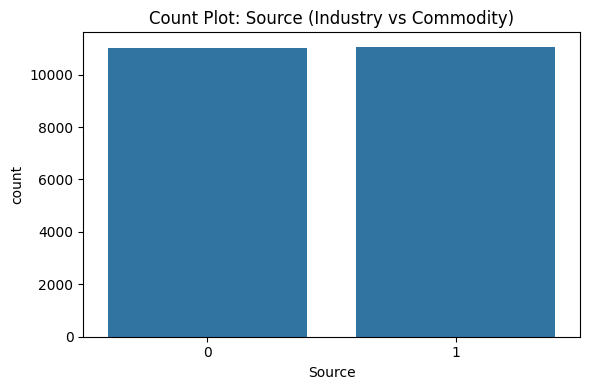

In [ ]:

plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()


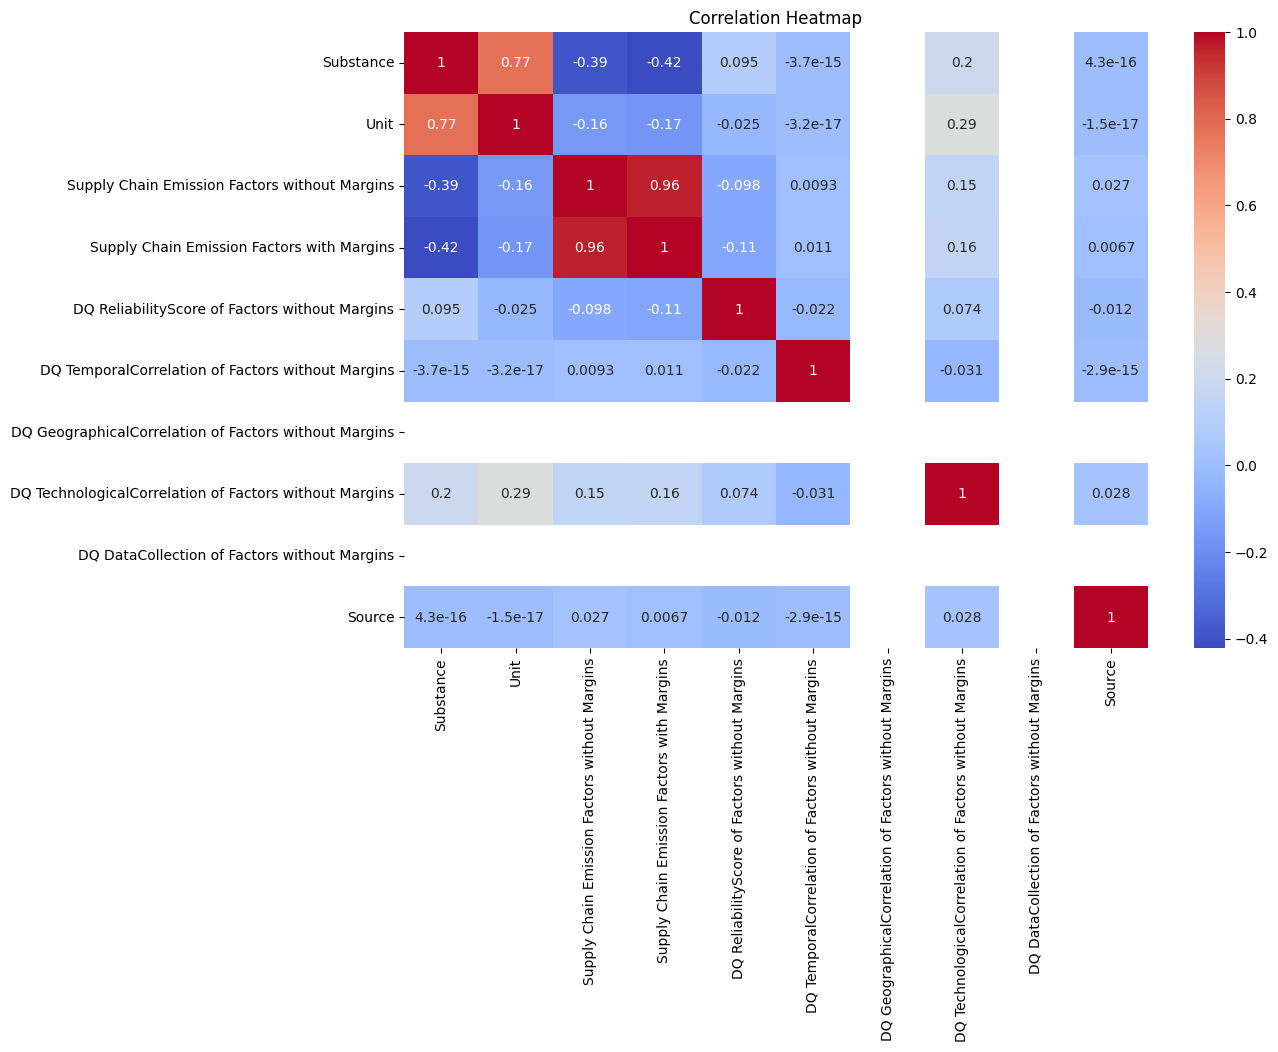

In [ ]:
df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [44]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [45]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')


RMSE: 0.08397465759630676
R² Score: 0.874458416193784


In [46]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))


Final RMSE: 0.07899840783561306
Final R²: 0.8888964855628223


In [48]:
!mkdir models
joblib.dump(best_model, 'models/final_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [49]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [51]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)


In [52]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  RMSE: {rmse:.4f}\n  R² Score: {r2:.4f}\n")

# Evaluate all
evaluate_model("Random Forest", y_test, y_pred)
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Gradient Boosting", y_test, y_pred_gbr)


Random Forest:
  RMSE: 0.0840
  R² Score: 0.8745

Linear Regression:
  RMSE: 0.0779
  R² Score: 0.8919

Gradient Boosting:
  RMSE: 0.0772
  R² Score: 0.8938



In [53]:
# Evaluate all models and collect metrics
from sklearn.metrics import mean_squared_error, r2_score

results = {}

# Random Forest
results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R2': r2_score(y_test, y_pred)
}

# Linear Regression
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'R2': r2_score(y_test, y_pred_lr)
}

# Gradient Boosting
results['Gradient Boosting'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
    'R2': r2_score(y_test, y_pred_gbr)
}


/tmp/ipython-input-54-939880809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_scores, palette='Blues_d')
/tmp/ipython-input-54-939880809.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Greens_d')


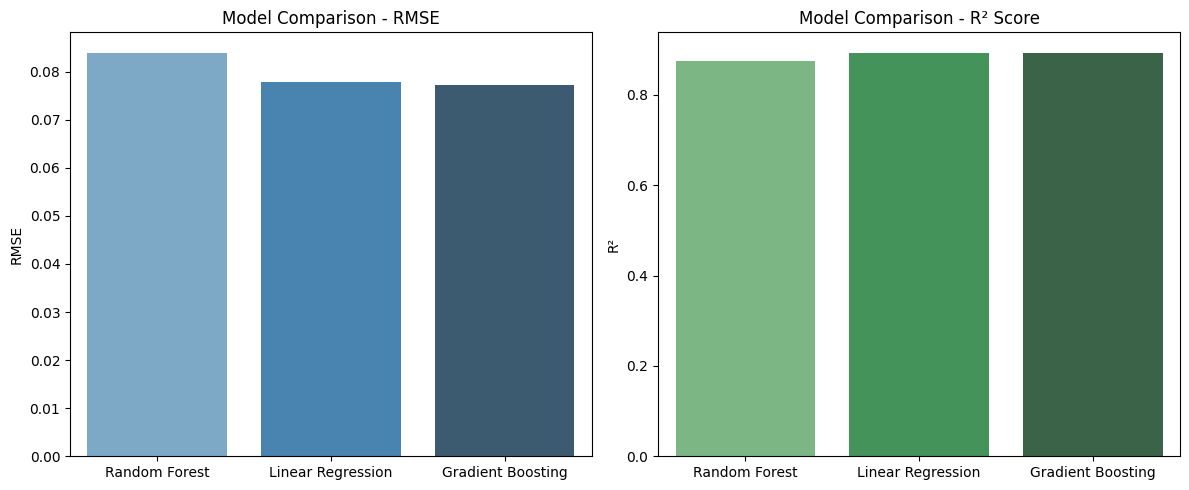

In [54]:
# Bar plot for RMSE and R2 Score
import matplotlib.pyplot as plt

models = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in models]
r2_scores = [results[model]['R2'] for model in models]

# Set up plots side-by-side
plt.figure(figsize=(12, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=rmse_scores, palette='Blues_d')
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")

# R² Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_scores, palette='Greens_d')
plt.title("Model Comparison - R² Score")
plt.ylabel("R²")

plt.tight_layout()
plt.show()


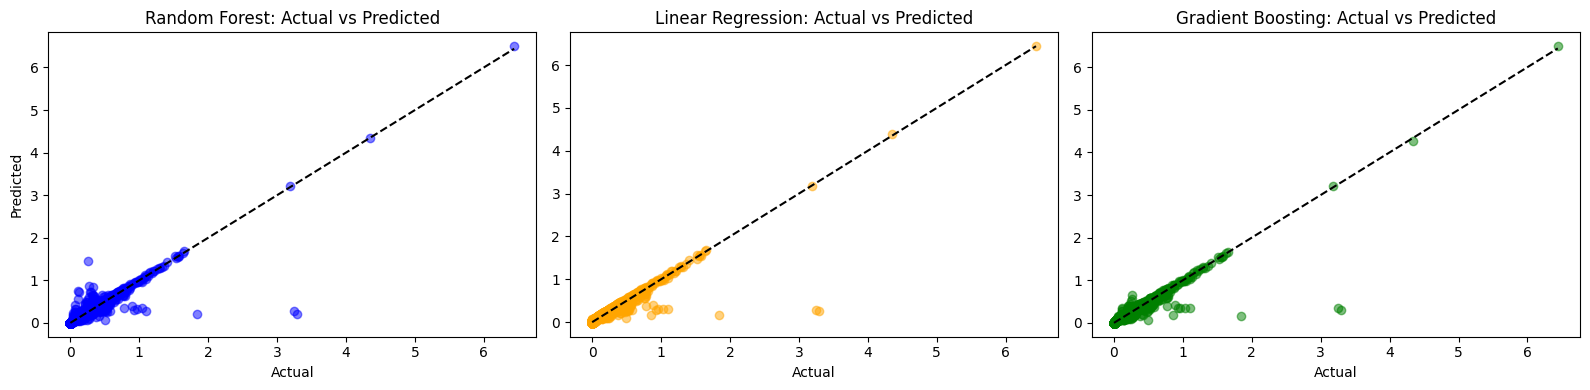

In [55]:
plt.figure(figsize=(16, 4))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Linear Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Gradient Boosting: Actual vs Predicted")
plt.xlabel("Actual")

plt.tight_layout()
plt.show()


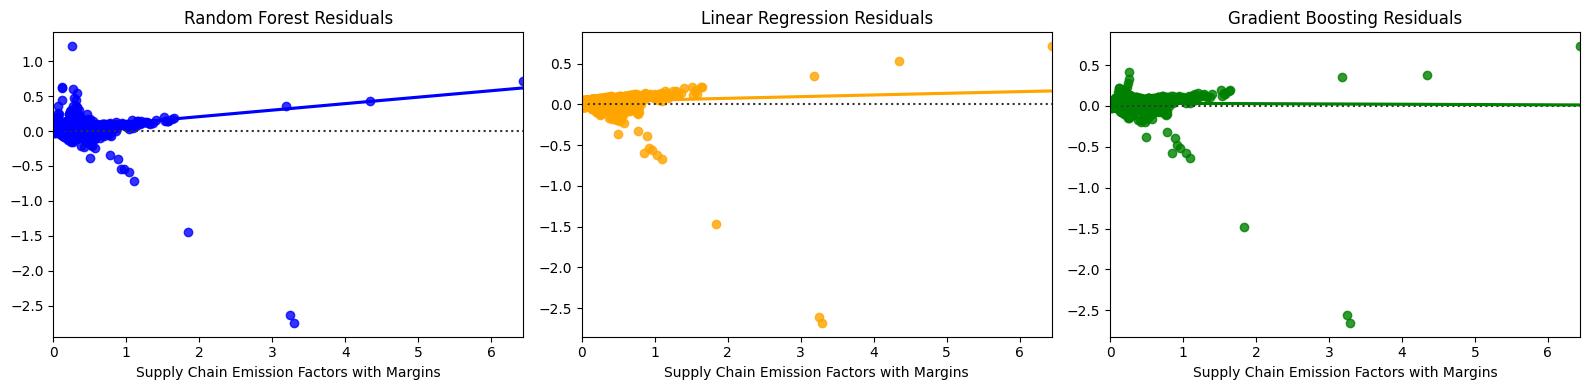

In [56]:
plt.figure(figsize=(16, 4))

# Random Forest Residuals
plt.subplot(1, 3, 1)
sns.residplot(x=y_test, y=y_pred, lowess=True, color='blue')
plt.title("Random Forest Residuals")

# Linear Regression Residuals
plt.subplot(1, 3, 2)
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color='orange')
plt.title("Linear Regression Residuals")

# Gradient Boosting Residuals
plt.subplot(1, 3, 3)
sns.residplot(x=y_test, y=y_pred_gbr, lowess=True, color='green')
plt.title("Gradient Boosting Residuals")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


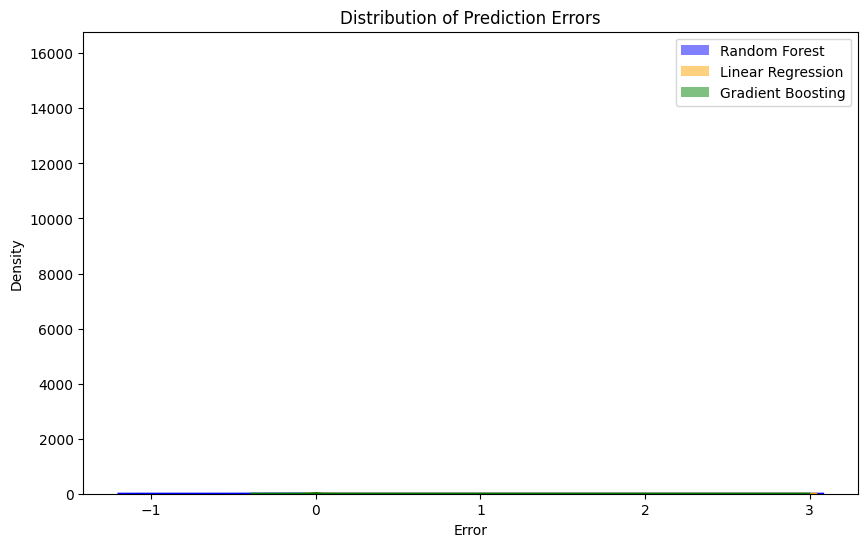

In [57]:
errors_rf = y_test - y_pred
errors_lr = y_test - y_pred_lr
errors_gbr = y_test - y_pred_gbr

plt.figure(figsize=(10, 6))
sns.histplot(errors_rf, kde=True, color='blue', label='Random Forest', stat="density")
sns.histplot(errors_lr, kde=True, color='orange', label='Linear Regression', stat="density")
sns.histplot(errors_gbr, kde=True, color='green', label='Gradient Boosting', stat="density")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.legend()
plt.show()


**Week 2 Summary**

Loaded and combined Excel data from multiple years.

Cleaned and preprocessed the dataset.

Converted categorical columns (Substance, Unit, Source) to numeric.

Dropped unused or irrelevant columns.

Visualized data distributions and relationships.

Scaled features and split data into training/testing sets.

Trained a Random Forest Regressor model.

Performed hyperparameter tuning with GridSearchCV.

Trained two more models: Linear Regression and Gradient Boosting.

Evaluated models using RMSE and R² Score.

Visualized model comparisons and residuals.

Saved the best model and scaler for future use.
